# Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

**Требования к анализу:**

* построить не менее 4 визуализаций различных видов; <br>
* каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; <br>
* по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?). <br>

**Дополнительная часть (необязательная)**

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path

url = 'https://raw.githubusercontent.com/NewAvalon-git/PYDA45/PYDA45-3-Statistic/WHR2023.csv'

### Описание Датасета
https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023
#### World Happiness Report 2023
<br>
* Доклад о мировом счастье является важным обзором состояния глобального счастья. Отчет продолжает завоевывать мировое признание, поскольку правительства, организации и гражданское общество все чаще используют индикаторы счастья для обоснования своих политических решений. 
<br>
Ведущие эксперты в различных областях — экономика, психология, анализ опросов, национальная статистика, здравоохранение, государственная политика и т. д. — описывают, как можно эффективно использовать измерения благосостояния для оценки прогресса наций. Отчеты рассматривают состояние счастья в современном мире и показывают, как новая наука о счастье объясняет индивидуальные и национальные различия в счастье.
<br>
<br>
* В столбцах, следующих за оценкой счастья, оценивается степень, в которой каждый из шести факторов:

1) ВВП на душу населения, 
2) социальная поддержка, 
3) ожидаемая продолжительность жизни, 
4) свобода,
5) щедрость,
6) отсутствие коррупции
<br>
способствует тому, чтобы оценки жизни в каждой стране были выше, чем в Антиутопии. 

<i> Антиутопия - гипотетическая страна, которая имеет значения, равные самым низким средним национальным показателям в мире по каждому из шести факторов. Они не влияют на общий балл, сообщаемый по каждой стране, но объясняют, почему одни страны занимают более высокое место, чем другие.

The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others


### Загрузка и предобратка данных Датасета

In [91]:
df_happines_full = pd.read_csv(url)

In [92]:
df_happines_full

Country name  Ladder score  Standard error of ladder score  \
0             Finland         7.804                           0.036   
1             Denmark         7.586                           0.041   
2             Iceland         7.530                           0.049   
3              Israel         7.473                           0.032   
4         Netherlands         7.403                           0.029   
..                ...           ...                             ...   
132  Congo (Kinshasa)         3.207                           0.095   
133          Zimbabwe         3.204                           0.061   
134      Sierra Leone         3.138                           0.082   
135           Lebanon         2.392                           0.044   
136       Afghanistan         1.859                           0.033   

     upperwhisker  lowerwhisker  Logged GDP per capita  Social support  \
0           7.875         7.733                 10.792           0.969   
1           7.667         7.506                 10.962           0.954   
2           7.625         7.434                 10.896           0.983   
3           7.535         7.411                 10.639           0.943   
4           7.460         7.346                 10.942           0.930   
..            ...           ...                    ...             ...   
132         3.394         3.020                  7.007           0.652   
133         3.323         3.084                  7.641           0.690   
134         3.299         2.976                  7.394           0.555   
135         2.479         2.305                  9.478           0.530   
136         1.923         1.795                  7.324           0.341   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                     71.150                         0.961      -0.019   
1                     71.250                         0.934       0.134   
2                     72.050                         0.936       0.211   
3                     72.697                         0.809      -0.023   
4                     71.550                         0.887       0.213   
..                       ...                           ...         ...   
132                   55.375                         0.664       0.086   
133                   54.050                         0.654      -0.046   
134                   54.900                         0.660       0.105   
135                   66.149                         0.474      -0.141   
136                   54.712                         0.382      -0.081   

     Perceptions of corruption  Ladder score in Dystopia  \
0                        0.182                     1.778   
1                        0.196                     1.778   
2                        0.668                     1.778   
3                        0.708                     1.778   
4                        0.379                     1.778   
..                         ...                       ...   
132                      0.834                     1.778   
133                      0.766                     1.778   
134                      0.858                     1.778   
135                      0.891                     1.778   
136                      0.847                     1.778   

     Explained by: Log GDP per capita  Explained by: Social support  \
0                               1.888                         1.585   
1                               1.949                         1.548   
2                               1.926                         1.620   
3                               1.833                         1.521   
4                               1.942                         1.488   
..                                ...                           ...   
132                             0.531                         0.784   
133                             0.758                         0.881   
134               

In [93]:
columns_tranlate = {
    'Country name' : 'Страна', 
    'Ladder score' : 'Оценка счастья',
    'Logged GDP per capita' : 'ВВП на душу населения',
    'Social support' : 'Социальная поддержка',
    'Healthy life expectancy' : 'Ожидаемая продолжительность жизни',
    'Freedom to make life choices' : 'Свобода выбора',
    'Generosity' : 'Щедрость',
    'Perceptions of corruption' : 'Отстутствие коррупции'
}

df_happines = df_happines_full.copy()
df_happines = df_happines.loc[ : , columns_tranlate.keys()]
df_happines.rename(columns=columns_tranlate, inplace=True)

In [94]:
df_happines.head()

Страна  Оценка счастья  ВВП на душу населения  Социальная поддержка  \
0      Finland           7.804                 10.792                 0.969   
1      Denmark           7.586                 10.962                 0.954   
2      Iceland           7.530                 10.896                 0.983   
3       Israel           7.473                 10.639                 0.943   
4  Netherlands           7.403                 10.942                 0.930   

   Ожидаемая продолжительность жизни  Свобода выбора  Щедрость  \
0                             71.150           0.961    -0.019   
1                             71.250           0.934     0.134   
2                             72.050           0.936     0.211   
3                             72.697           0.809    -0.023   
4                             71.550           0.887     0.213   

   Отстутствие коррупции  
0                  0.182  
1                  0.196  
2                  0.668  
3                  0.708  
4                  0.379

In [82]:
df_happines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Страна                             137 non-null    object 
 1   Оценка счастья                     137 non-null    float64
 2   ВВП на душу населения              137 non-null    float64
 3   Социальная поддержка               137 non-null    float64
 4   Ожидаемая продолжительность жизни  136 non-null    float64
 5   Свобода выбора                     137 non-null    float64
 6   Щедрость                           137 non-null    float64
 7   Отстутствие коррупции              137 non-null    float64
dtypes: float64(7), object(1)
memory usage: 8.7+ KB


In [83]:
df_happines.describe()

Оценка счастья  ВВП на душу населения  Социальная поддержка  \
count      137.000000             137.000000            137.000000   
mean         5.539796               9.449796              0.799073   
std          1.139929               1.207302              0.129222   
min          1.859000               5.527000              0.341000   
25%          4.724000               8.591000              0.722000   
50%          5.684000               9.567000              0.827000   
75%          6.334000              10.540000              0.896000   
max          7.804000              11.660000              0.983000   

       Ожидаемая продолжительность жизни  Свобода выбора    Щедрость  \
count                         136.000000      137.000000  137.000000   
mean                           64.967632        0.787394    0.022431   
std                             5.750390        0.112371    0.141707   
min                            51.530000        0.382000   -0.254000   
25%                            60.648500        0.724000   -0.074000   
50%                            65.837500        0.801000    0.001000   
75%                            69.412500        0.874000    0.117000   
max                            77.280000        0.961000    0.531000   

       Отстутствие коррупции  
count             137.000000  
mean                0.725401  
std                 0.176956  
min                 0.146000  
25%                 0.668000  
50%                 0.774000  
75%                 0.846000  
max                 0.929000

### 1. График. Первичная визуальная оценка "все на все"
* поиск попарных связей между параметрами
* выбор показателей для дальнейшего анализа

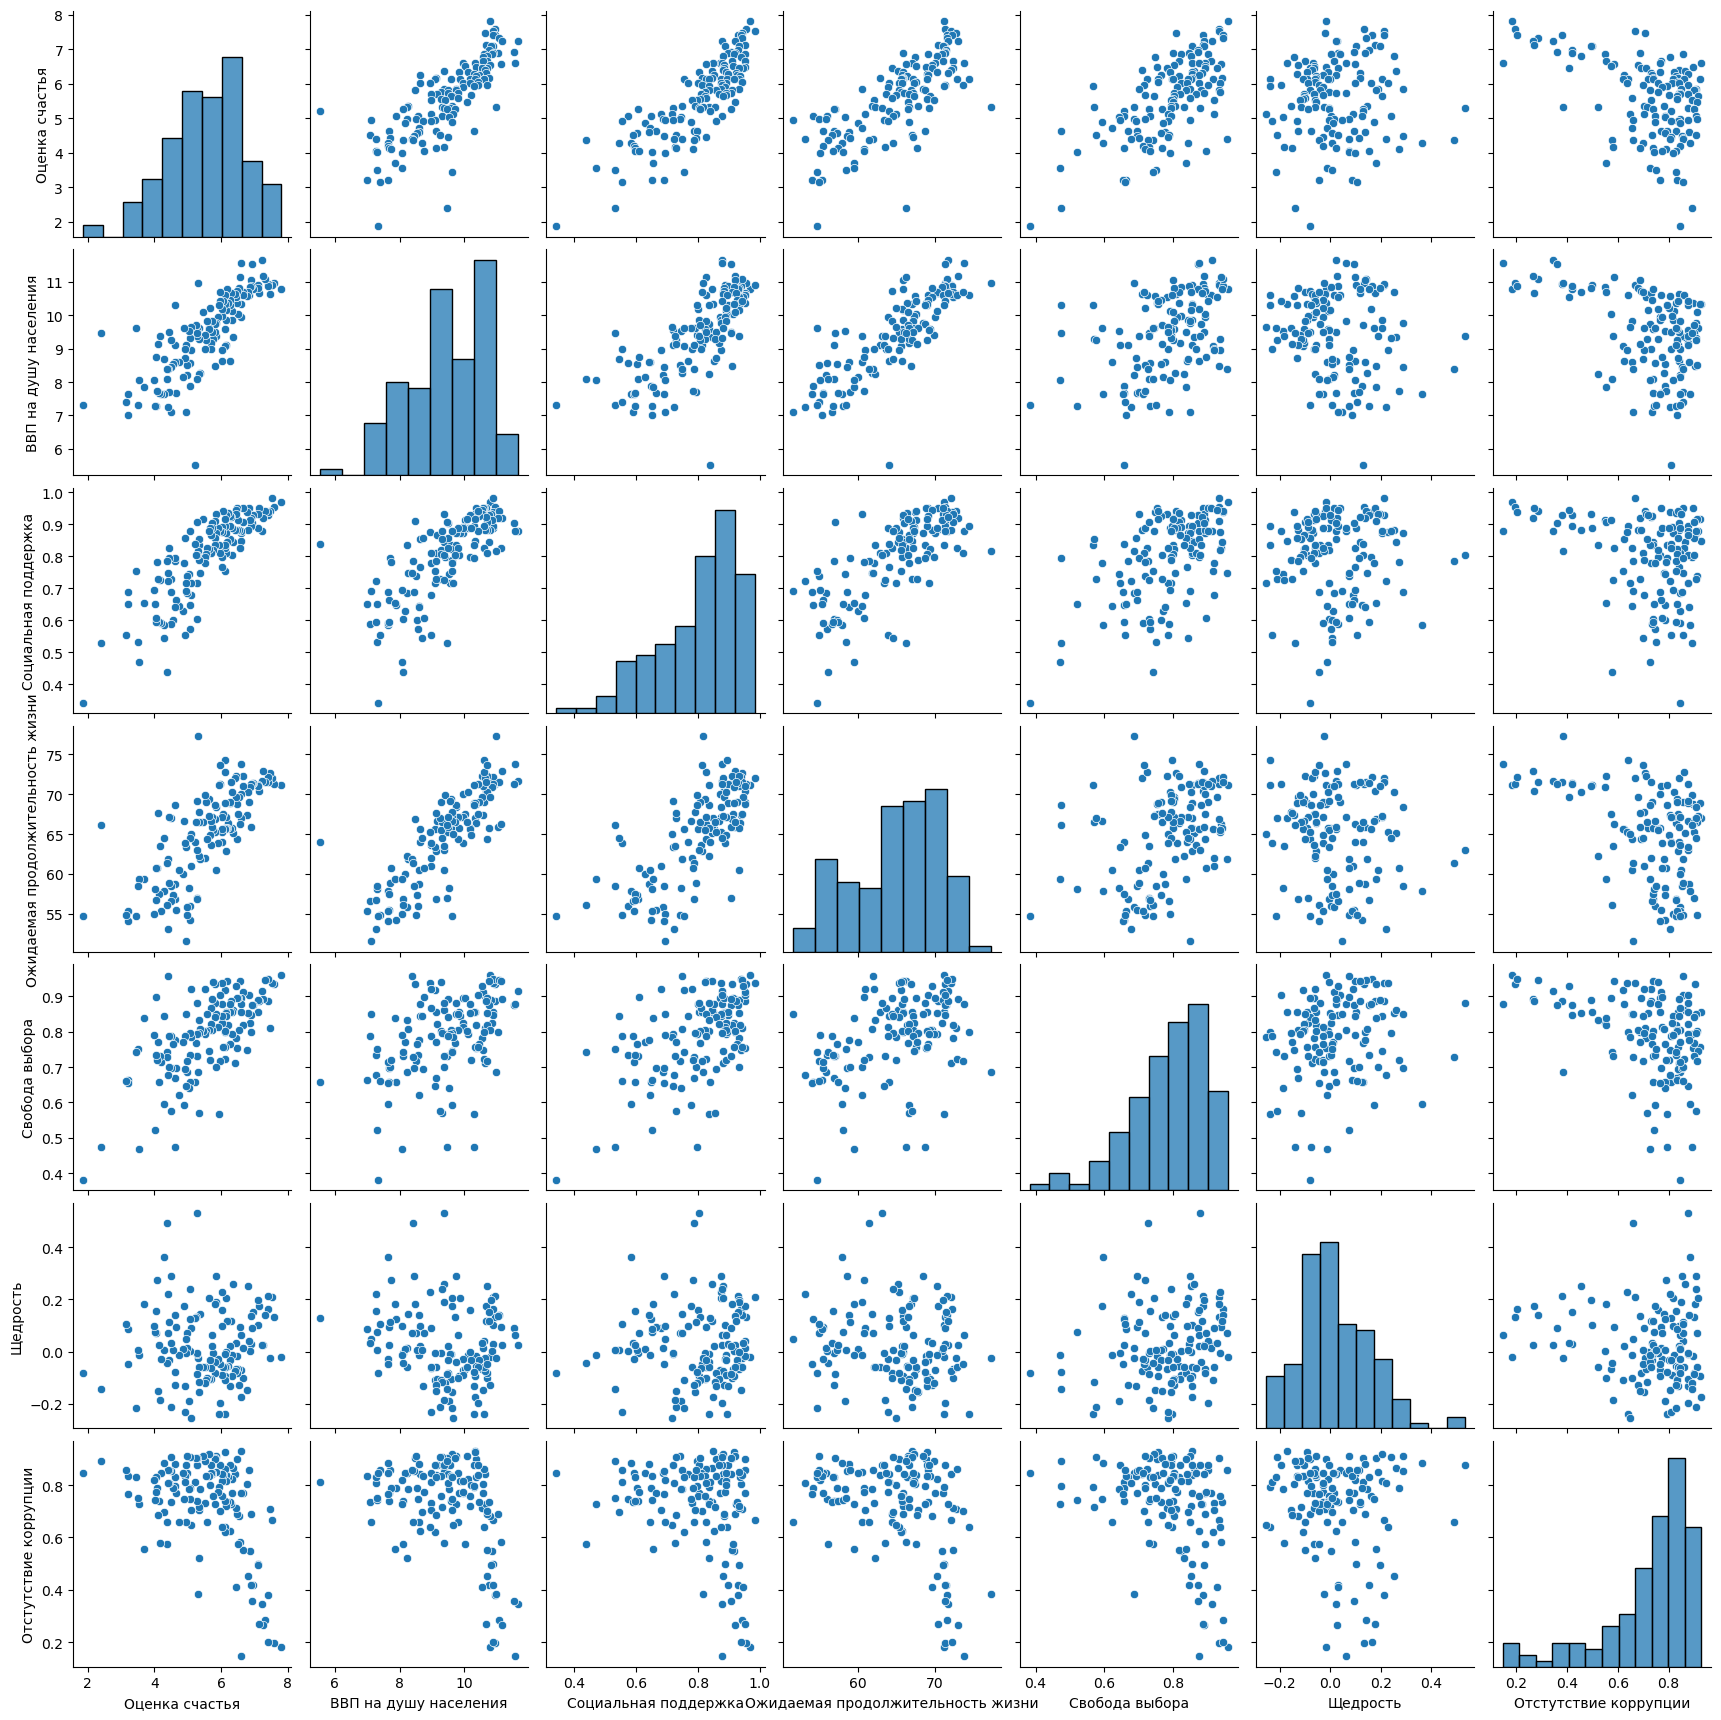

In [86]:
sns.pairplot(df_happines)

#### 1. Выводы "все на все"
* Так как показатели не описаны (методики определения и шкалы), то некоторые из них интуитивно не понятны.
Например, "отсутствие коррупции" - чем выше, тем меньше или наоборот?
* Выберем для дальнейшего анализа более менее понятные показатели (возможно, даже измеримые): Уровень ВВП и Соц поддержка.
* Интересно: графики распределения не "нормальные". Но. Вот агрегированная "Оценка счастья" наиболее подчинена нормальному распределению  

### 2. График. Bar Chart
* Сразу интересно узнать, а как по странам распределились оценки (от самых счастливых, до менее счастливых).
* Естественно, интересно подсветить Россию

In [164]:
# Подготовка уменьшенной выборки для комфортной вищуализации

df_happines_bar = df_happines[['Страна', 'Оценка счастья']].sort_values('Оценка счастья', ascending = False)
df_happines_bar_small = pd.concat([
    df_happines_bar.head(10),
    df_happines_bar[df_happines_bar['Страна'] == 'Russia'],
    df_happines_bar.tail(10)    
]).sort_values('Оценка счастья', ascending = False)

In [228]:
# Определение цветов по фильтру страны

def color_set(item_to_paint, items_to_check, color_to_paint, color_base):
    return color_to_paint if item_to_paint in items_to_check else color_base
    
# print(color_set('Russia', ['Russia', 'Finland'], 'r', 'b'))
df_happines_bar_small['Color'] = df_happines_bar_small['Страна'].apply(color_set, args=(['Russia'], 'c', 'b'))

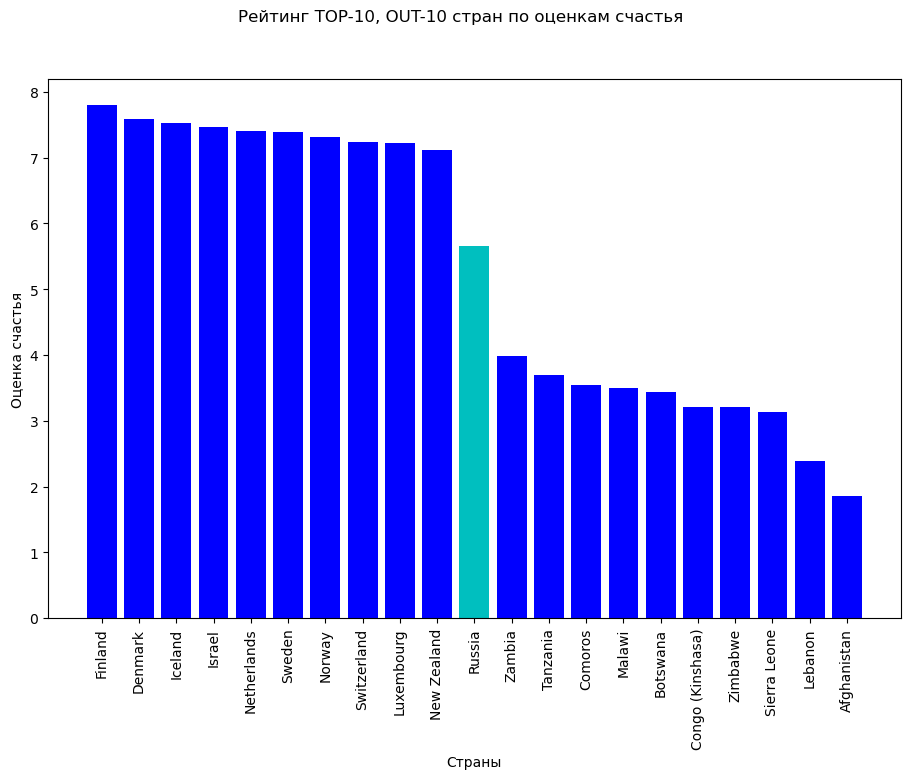

In [397]:
plt.bar(
    df_happines_bar_small['Страна'],
    df_happines_bar_small['Оценка счастья'],
    color = df_happines_bar_small['Color']
)

plt.suptitle("Рейтинг TOP-10, OUT-10 стран по оценкам счастья")
plt.xlabel("Страны")
plt.ylabel("Оценка счастья")
plt.xticks(rotation = 90)

plt.show()

#### 2. Выводы. Bar Chart
* Ожидалось, что европейские страные будут в списке выше, чем, например африканские или некоторый восточные. 
* Так и получилось

### 3. Распределение "Оценок счастья"

<Axes: title={'center': 'Распределение оценок счастья'}, ylabel='Frequency'>

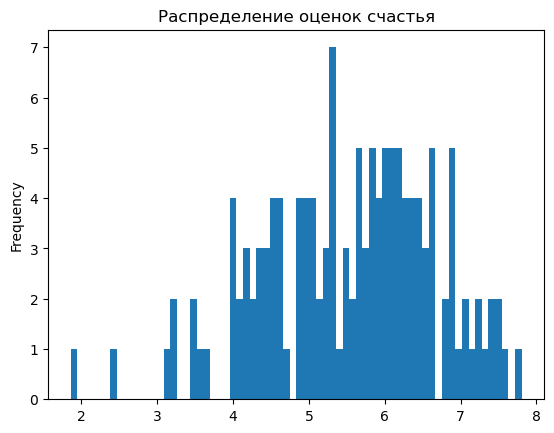

In [265]:
df_happines['Оценка счастья'].plot(
    kind='hist',
    title='Распределение оценок счастья', 
    bins=round(len(df_happines) / 2))

#### 2. Выводы.  Распределение "Оценок счастья"
* присутствуют выбросы
* распределение смещено вправо
* концетрация оценок в диапазоне 4 - 7,6
* Интересные области:
<br>
самая частая оценка ~5,4
<br>
аутсайдеры до 3

**Гипотезы для дальнейшей проверки**

* Интересно сравнить разрезы показателей аутсайдеров и лидеров
* Сравнение будем проводить для частотных диапазонов (до 3-4 и от 6,5-7). Диапазон будет отрегулировать в процессе анализа. Например, в зависимости от количества стран попавших в выборку.


### 4. Сравнение лидеров и аутсайдеров

In [317]:
def categorize_intervals(value_to_categorize, interval, qty_sub_intrvals):
    '''
    Категоризирует value_to_categorize внутри interval
    Длина "отрезков" задается qty_sub_intrvals
    
    value_to_categorize - число, которое необходимо категоризировать
    interval - список значений. Из него будет выбран min-max.
    qty_sub_intrvals - количество категорий (суб интервалов) на которые надо разбить interval
    '''
    
    min_ = min(interval)
    max_ = max(interval)
    sub_int_len = (max_ - min_) / qty_sub_intrvals
    
    sub_intervals_dict ={}
    cur_step = min_  
    category_num = 1
    
    while cur_step < max_:
        sub_intervals_dict.update({category_num : [cur_step, cur_step + sub_int_len]})
        
        category_num += 1
        cur_step += sub_int_len
   
    for key, el in sub_intervals_dict.items():
# словие value <= max в субдиапазоне
        if (
            (
                value_to_categorize > min(el) and
                value_to_categorize <= max(el)
            ) or
            value_to_categorize == min_
           ):
            
            return key

    return 'Not defined'

# l = categorize_intervals(3, [0,10], 5)

# interavl = 

min_ = min(df_happines['Оценка счастья'])
max_ = max(df_happines['Оценка счастья'])
print(min_, max_)
df_happines['Cat_happy'] = df_happines['Оценка счастья'].apply(categorize_intervals, args = [[min_, max_], 7])

1.859 7.804


In [339]:
df_outliers = df_happines[
    df_happines['Cat_happy'] <= 3
]

df_leaders = outliers = df_happines[
    df_happines['Cat_happy'] >= 7
]

df_out_lead = pd.concat([df_outliers, df_leaders])

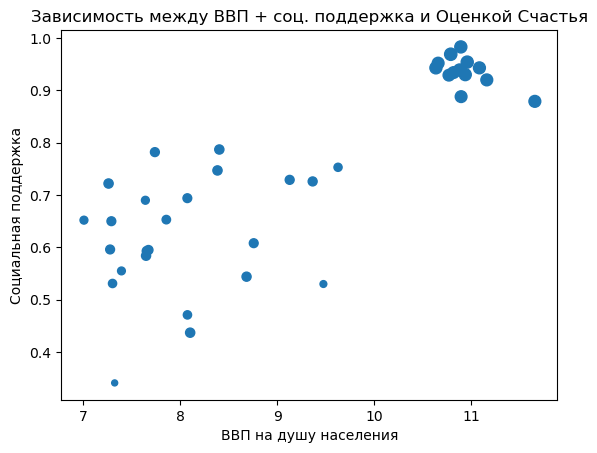

In [340]:
df_out_lead.plot(kind='scatter',
        x = 'ВВП на душу населения',
        y = 'Социальная поддержка',
        s = df_out_lead['Оценка счастья']*10,
        title='Зависимость между ВВП + соц. поддержка и Оценкой Счастья',
       )

plt.show()

#### !!! Неожиданно.  Распределение "Оценок счастья"
* у лидеров "кучкование" более ярко выражено.
* а вот у аутсайдеров разброс влияния на оценку выбранных параметров визуально больше.

**Подтверждаем Л.Н. Толстого: "Все счастливые семьи похожи друг на друга, каждая несчастливая семья несчастлива по-своему."**

    <br> тем не менее, возможно, на Оценку счастья у аутсайдеров сильнее влияют другие параметры

### 5. График. Тестирование зависимости Оценки счастья от ВВП и Соц поддержки
* посмотрим, насколько линейно-жесткая связь оценки от указанных показателей 
<br>

**Гипотеза: с ростом оценки выбранного показателя, растет Общая оценка Счастья**

In [387]:
df_VVP = (
    df_happines.loc[:, ['Оценка счастья', 'ВВП на душу населения']]
    .sort_values('ВВП на душу населения', ascending = False)
)
df_social = (
    df_happines.loc[:, ['Оценка счастья', 'Социальная поддержка']]
    .sort_values('Социальная поддержка', ascending = False)
)

df_social.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 2 to 136
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Оценка счастья        137 non-null    float64
 1   Социальная поддержка  137 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [391]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

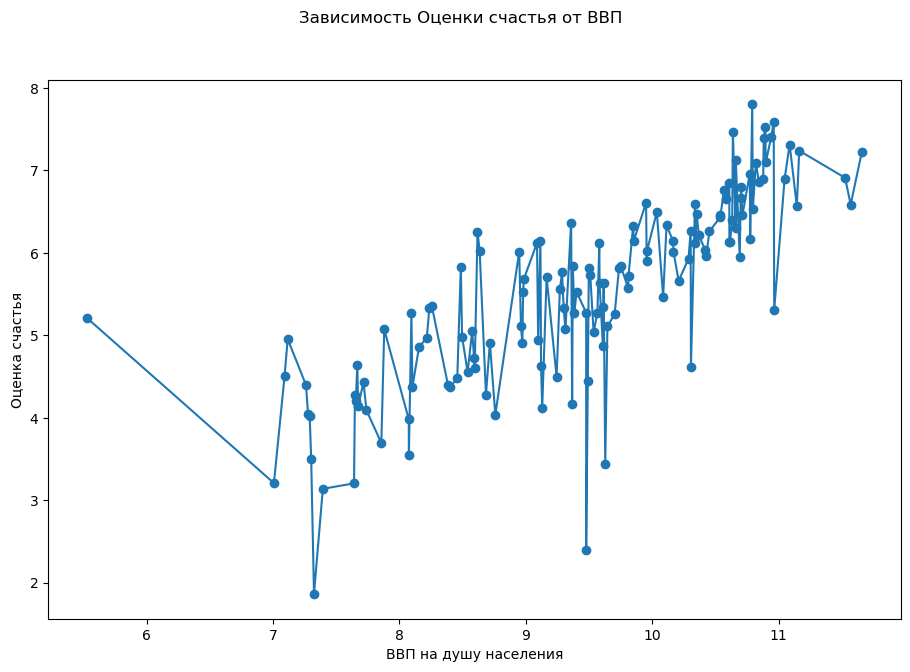

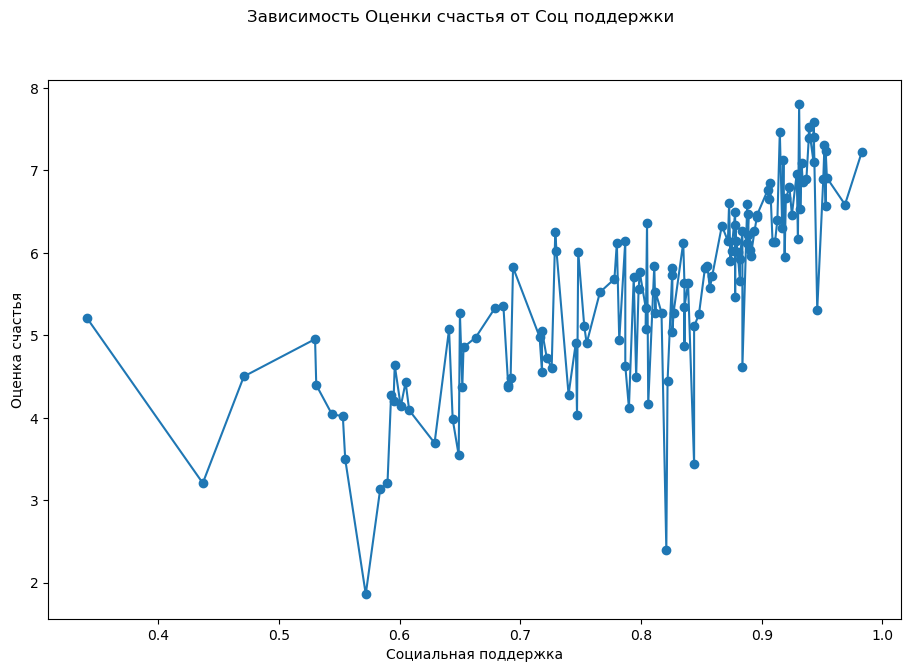

In [396]:
plt.plot(df_VVP['ВВП на душу населения'], df_VVP['Оценка счастья'], marker='o')
plt.suptitle('Зависимость Оценки счастья от ВВП')
plt.xlabel('ВВП на душу населения')
plt.ylabel('Оценка счастья')
plt.show()

plt.plot(df_social['Социальная поддержка'], df_VVP['Оценка счастья'], marker='o')
plt.suptitle('Зависимость Оценки счастья от Соц поддержки')
plt.xlabel('Социальная поддержка')
plt.ylabel('Оценка счастья')
plt.show()

#### 5. График. Тестирование зависимости Оценки счастья от ВВП и Соц поддержки
* В некотором приближении, конечно, "Оценка счастья" растет с ростом ВВП и Соц поддержки.
<br>
Однако, обратим внимание, коридор колебаний широкий даже в рамках отдельных диапазонов (например, Соц поддержки 0.7-0.8, а оценки от 4 до 6 (то есть это ~25% диапазона оценко 2 / 8).

**Наблюдение. Графики похожи по своим профилям, следовательно =>**

* Похоже, что может быть связь между ВВП и соц поддержкой.
* При анализе этой связи еще стоит обратить внимание на другие показатели, например, "Perceptions of corruption"